In [88]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data Extraction

In [48]:
data = pd.read_csv("boston.csv")

In [23]:
data.head()

,0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
X = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

In [50]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [51]:
y = data[['MEDV']]

In [52]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Data Normalization

In [53]:
X = (X - X.mean())/(X.max()-X.min())

In [54]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [68]:
X = np.array(X)
y = np.array(y)

In [69]:
X

array([[-0.0405441 ,  0.06636364, -0.32356227, ..., -0.33569506,
         0.10143217, -0.21172912],
       [-0.04030818, -0.11363636, -0.14907546, ..., -0.06973762,
         0.10143217, -0.09693883],
       [-0.0403084 , -0.11363636, -0.14907546, ..., -0.06973762,
         0.09116942, -0.23794325],
       ...,
       [-0.03993221, -0.11363636,  0.02907703, ...,  0.27068792,
         0.10143217, -0.1935172 ],
       [-0.03938337, -0.11363636,  0.02907703, ...,  0.27068792,
         0.09273279, -0.17033839],
       [-0.04008226, -0.11363636,  0.02907703, ...,  0.27068792,
         0.10143217, -0.13170704]])

## Train/Dev Set Data Split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
print('Training Set : ',X_train.shape,y_train.shape)
print('Dev Set : ',X_test.shape,y_test.shape)

Training Set :  (404, 13) (404, 1)
Dev Set :  (102, 13) (102, 1)


## Train with our Linear Model

In [72]:
from linreg import LinearModel

In [148]:
model = LinearModel(num_features = 13)

In [149]:
losses = model.train(X_train,y_train,500,0.7)

Iter: 0, Current loss: 322.0127
Iter: 50, Current loss: 13.3609
Iter: 100, Current loss: 11.6327
Iter: 150, Current loss: 11.2160
Iter: 200, Current loss: 11.0480
Iter: 250, Current loss: 10.9599
Iter: 300, Current loss: 10.9085
Iter: 350, Current loss: 10.8770
Iter: 400, Current loss: 10.8573
Iter: 450, Current loss: 10.8447


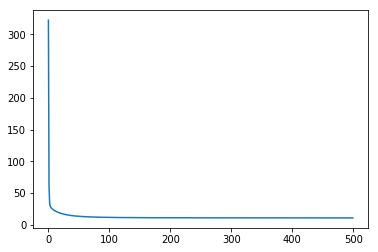

In [150]:
plt.plot(losses)

## Prediction

In [151]:
y_hat = model.predict(X_test)

## Evaluation

In [152]:
from sklearn.metrics import r2_score

In [153]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 3.18
Residual sum of squares (MSE): 24.34
R2-score: 0.63
